In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
df= pd.read_excel('Cleaned_Survey_Data.xlsx')
# Change the settings to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [267]:
# Now when you use df.head(), you will see all rows and columns
df.head()

,Timestamp,Family_Structure,Age,Gender,Occupation,Education,Income_Range,Primary_Shopper,Shopping_Companion,Shopping_Frequency,Shopping_Time,Preferred_Store,Factor_Proximity,Factor_Pricing,Factor_Variety,Factor_Fresh_Produce,Factor_Store_Layout,Factor_Online_Options,Product_Preferences,Brand_Importance,Bulk_or_Need,Quantity_Per_Trip,Time_Spent_Per_Visit,Avg_Spend_Per_Visit,Avg_Spend_Monthly,Payment_Mode,Discount_Awareness,Discount_Usage,Discount_Value,Discount_Influence,Loyalty_Score,Online_Shopping_Frequency,Online_Platforms,Online_Shopping_Factors,Cart_Abandonment_Reasons,Store_Quality_Rating,Store_Pricing_Rating,Recommendation_Likelihood,Sustainability_Importance,Eco_Friendly_Actions,Store_Sustainability_Efforts,Email
0,2-11-2025 20:38:34,Nuclear family,21,Male,Student,"Postgraduate (Master’s, MBA)","₹75,000 - ₹99,999",Joint responsibility,With family,Once a month,Evening,"Supermarkets/hypermarkets (e.g., D-Mart, Relia...",1 (Most important),2,1 (Most important),1 (Most important),2,4,No preference,Somewhat important,Bulk purchases,5-9.9 kg,"1 - 1.5 hours (e.g., stocking up with a full c...",500,15000,Debit/Credit card,Newspaper,Never,Not sure,No difference,4,Never,NaN,NaN,NaN,4,4.00,Likely,Somewhat important,"Yes, always",Maybe,NaN
1,2-11-2025 20:39:42,Nuclear family,21,Female,Student,"Postgraduate (Master’s, MBA)","₹25,000 - ₹49,999",Joint responsibility,With family,Once a week,Evening,Local Kirana stores,1 (Most important),2,1 (Most important),1 (Most important),1 (Most important),2,Kirana store,Somewhat important,As needed,2-4.9 kg,"15 minutes - 45 minutes (e.g., essential mid-w...",3000,15000,"UPI (e.g., Google Pay, PhonePe, Paytm, Amazon ...",Online ads,Rarely,Yes,"Yes, significantly",5,Rarely,"Blinkit, Swiggy Instamart, Zepto","Delivery speed, Product availability, Website/...",High delivery cost,5,5.00,Very likely,Very important,"Yes, always",Yes,NaN
2,2-11-2025 21:12:43,Joint family,22,Male,Student,"Postgraduate (Master’s, MBA)","₹1,25,000 - ₹1,49,999",Other family member,Alone,2-3 times per week,Morning,"Supermarkets/hypermarkets (e.g., D-Mart, Relia...",4,4,4,4,4,4,Supermarket,Somewhat important,As needed,2-4.9 kg,"15 minutes - 45 minutes (e.g., essential mid-w...",3k,15k,Cash,In-store promotions,Occasionally,No,"Yes, slightly",4,Occasionally,JioMart,Customer service,Long delivery times,3,4.00,Unlikely,Somewhat important,"Yes, always",Yes,NaN
3,2-11-2025 21:14:03,Nuclear family,21,Female,Student,Graduate (Bachelor’s degree),"₹25,000 - ₹49,999",Self,Alone,Once a month,Evening,Local Kirana stores,4,3,3,3,3,5 (Least important),Kirana store,Neutral,Bulk purchases,Less than 2 kg,"15 minutes - 45 minutes (e.g., essential mid-w...",2000,5000,Cash,Word of mouth,Occasionally,Not sure,"Yes, slightly",5,Occasionally,"Swiggy Instamart, Zepto","Product availability, Payment options, Discounts",High delivery cost,4,4.00,Likely,Somewhat important,"Yes, occasionally",No,NaN
4,2-11-2025 21:15:13,Nuclear family,22,Male,Student,"Postgraduate (Master’s, MBA)","₹1,00,000 - ₹1,24,999",Joint responsibility,With family,2-3 times per week,Morning,Local Kirana stores,1 (Most important),3,2,1 (Most important),2,4,Kirana store,Somewhat important,Bulk purchases,5-9.9 kg,"45 minutes - 1 hour (e.g., a more comprehensiv...",770,7700,"UPI (e.g., Google Pay, PhonePe, Paytm, Amazon ...",In-store promotions,Occasionally,Not sure,"Yes, slightly",3,Never,NaN,NaN,NaN,5,4.00,Neutral,Neutral,Rarely,Maybe,NaN


In [268]:
df.columns

Index(['Timestamp', 'Family_Structure', 'Age', 'Gender', 'Occupation',
       'Education', 'Income_Range', 'Primary_Shopper', 'Shopping_Companion',
       'Shopping_Frequency', 'Shopping_Time', 'Preferred_Store',
       'Factor_Proximity', 'Factor_Pricing', 'Factor_Variety',
       'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options',
       'Product_Preferences', 'Brand_Importance', 'Bulk_or_Need',
       'Quantity_Per_Trip', 'Time_Spent_Per_Visit', 'Avg_Spend_Per_Visit',
       'Avg_Spend_Monthly', 'Payment_Mode', 'Discount_Awareness',
       'Discount_Usage', 'Discount_Value', 'Discount_Influence',
       'Loyalty_Score', 'Online_Shopping_Frequency', 'Online_Platforms',
       'Online_Shopping_Factors', 'Cart_Abandonment_Reasons',
       'Store_Quality_Rating', 'Store_Pricing_Rating',
       'Recommendation_Likelihood', 'Sustainability_Importance',
       'Eco_Friendly_Actions', 'Store_Sustainability_Efforts', 'Email'],
      dtype='object')

In [269]:
# Drop 'Email' and 'Timestamp' columns
df = df.drop(columns=['Email', 'Timestamp'])

In [270]:
def check_unique_values(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()
    return unique_values

# Use the function to check unique values
unique_values = check_unique_values(df)

# Display the unique values for each column
for column, values in unique_values.items():
    print(f"Column '{column}': {values}\n")


Column 'Family_Structure': ['Nuclear family' 'Joint family' nan]

Column 'Age': ['21' '22' '19' '25' '23' '38' '37' '40' '24' '35' '36' '18' '20' '44'
 '54' '26' '65 yrs' '45' '39' '47' '55' '16' '46' '28' '33' '17' '68' '43'
 '34' 'Fifty years ' '62' '50' '56' '32' '31' '30' '53' '59' '59 yrs' '51'
 '42' '15' '48' '47 /year' '60' '52' '27' '49' '56 yrs' '57' '1500'
 '57age' '58' '29']

Column 'Gender': ['Male' 'Female' 'Other']

Column 'Occupation': ['Student' 'Self-employed' 'Private sector employee' 'Homemaker'
 'Government employee' 'Retired']

Column 'Education': ['Postgraduate (Master’s, MBA)' 'Graduate (Bachelor’s degree)'
 'No formal education' 'Secondary (9th-12th standard)' 'Inter CA'
 'Under graduate' 'IITian ' 'ITUS']

Column 'Income_Range': ['₹75,000 - ₹99,999' '₹25,000 - ₹49,999' '₹1,25,000 - ₹1,49,999'
 '₹1,00,000 - ₹1,24,999' 'More than ₹1,50,000' 'Less than ₹25,000'
 '₹50,000 - ₹74,999']

Column 'Primary_Shopper': ['Joint responsibility' 'Other family member' 'Self' 'S

In [271]:
# Fill NaN values with the most frequent value (mode)
mode_value = df['Family_Structure'].mode()[0]
df['Family_Structure'] = df['Family_Structure'].fillna(mode_value)

In [272]:
df['Family_Structure'].unique()

array(['Nuclear family', 'Joint family'], dtype=object)

In [273]:
import pandas as pd
import numpy as np

def clean_age_column(df):
    # Define a mapping for text-based numbers
    text_to_num = {
        'Fifty years': 50,
        '59 yrs': 59,
        '65 yrs': 65,
        '56 yrs': 56,
        '47 /year': 47,
        '57age': 57
    }

    # Replace text-based numbers with their numeric counterparts
    df['Age'] = df['Age'].replace(text_to_num)

    # Remove non-numeric characters
    df['Age'] = df['Age'].astype(str).str.extract('(\d+)')[0]

    # Convert the column back to numeric
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

    # Remove the row where 'Age' is 1500
    df = df[df['Age'] != 1500]

    # Handle incorrect values by setting a reasonable age range
    df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 120 else np.nan)

    return df

# Clean the 'Age' column
df = clean_age_column(df)

# Display unique values to verify the changes
print(df['Age'].unique())

[21. 22. 19. 25. 23. 38. 37. 40. 24. 35. 36. 18. 20. 44. 54. 26. 65. 45.
 39. 47. 55. 16. 46. 28. 33. 17. 68. 43. 34. nan 62. 50. 56. 32. 31. 30.
 53. 59. 51. 42. 15. 48. 60. 52. 27. 49. 57. 58. 29.]


C:\Users\AMOL\AppData\Local\Temp\ipykernel_11016\1087743900.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lambda x: x if 0 <= x <= 120 else np.nan)


C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


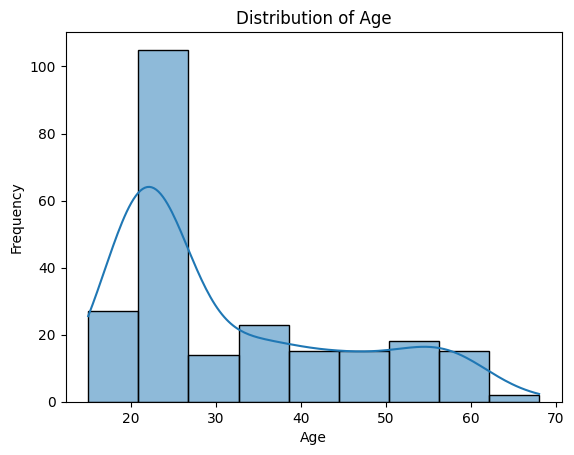

[21. 22. 19. 25. 23. 38. 37. 40. 24. 35. 36. 18. 20. 44. 54. 26. 65. 45.
 39. 47. 55. 16. 46. 28. 33. 17. 68. 43. 34. 62. 50. 56. 32. 31. 30. 53.
 59. 51. 42. 15. 48. 60. 52. 27. 49. 57. 58. 29.]


In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the 'Age' column
sns.histplot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Function to impute NaN values based on distribution
def impute_nan_values(df, column):
    # Check if the distribution is normal
    skewness = df[column].skew()
    if abs(skewness) < 0.5:
        # If skewness is close to 0, consider it normal distribution
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
    else:
        # If skewness is high, consider it skewed distribution
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
    
    return df

# Impute NaN values in the 'Age' column
df = impute_nan_values(df, 'Age')

# Display the unique values to verify the changes
print(df['Age'].unique())


In [275]:
def recategorize_and_simplify_education(value):
    if value in ['Inter CA', 'IITian ']:
        return 'Graduate'
    elif value == 'Under graduate':
        return 'No formal education'
    elif value == 'Postgraduate (Master’s, MBA)':
        return 'Postgraduate'
    elif value == 'Graduate (Bachelor’s degree)':
        return 'Graduate'
    elif value == 'Secondary (9th-12th standard)':
        return 'Secondary'
    else:
        return value

# Apply the combined function to the 'Education' column in your existing DataFrame
df['Education'] = df['Education'].apply(recategorize_and_simplify_education)

In [276]:
df['Education'].unique()

array(['Postgraduate', 'Graduate', 'No formal education', 'Secondary'],
      dtype=object)

In [277]:
# Function to categorize 'Shopping_Companion'
def categorize_shopping_companion(companion):
    if companion in ['With family', 'With Brother', 'All of the above.']:
        return 'With family'
    elif companion == 'Alone':
        return 'Alone'
    elif companion in ['With friends', 'Sometimes me or others ']:
        return 'With friends'
    else:
        return 'Other'

# Apply the function to the 'Shopping_Companion' column
df['Shopping_Companion'] = df['Shopping_Companion'].apply(categorize_shopping_companion)

In [278]:
df['Shopping_Companion'].unique()

array(['With family', 'Alone', 'With friends'], dtype=object)

In [279]:
def Preferred_Store(value):
    if value == 'Supermarkets/hypermarkets (e.g., D-Mart, Reliance Fresh)':
        return 'Supermarkets'
    elif value == 'Local Kirana stores':
        return 'Local Kirana stores'
    elif value == 'Street vendors':
        return 'Street vendors'
    elif value == 'Online stores (e.g., BigBasket, Blinkit, JioMart)':
        return 'Online stores'
    elif value == 'Farmers’ markets':
        return "Farmer's markets"
    else:
        return value

# Apply the combined function to the 'Preferred_Store' column in your existing DataFrame
df['Preferred_Store'] = df['Preferred_Store'].apply(Preferred_Store)

In [280]:
df['Preferred_Store'].unique()

array(['Supermarkets', 'Local Kirana stores', 'Street vendors',
       'Online stores', "Farmer's markets"], dtype=object)

In [281]:
# Function to convert '1 (Most important)' to '1' and '5 (Least important)' to '5'
def convert_importance(value):
    if value == '1 (Most important)':
        return '1'
    elif value == '5 (Least important)':
        return '5'
    else:
        return value

# List of columns to apply the function
columns_to_convert = [
    'Factor_Proximity', 'Factor_Pricing', 'Factor_Variety',
    'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options'
]

# Apply the function to the specified columns in the existing DataFrame
for column in columns_to_convert:
    df[column] = df[column].apply(convert_importance)

In [282]:
df['Factor_Proximity'].unique()

array(['1', '4', '3', '2', '5'], dtype=object)

In [283]:
# Function to simplify the 'Time_Spent_Per_Visit' values
def simplify_time_spent(value):
    return value.split(' (')[0]  # Split the string at ' (' and take the first part

# Apply the function to the 'Time_Spent_Per_Visit' column
df['Time_Spent_Per_Visit'] = df['Time_Spent_Per_Visit'].apply(simplify_time_spent)

In [284]:
df['Time_Spent_Per_Visit'].unique()

array(['1 - 1.5 hours', '15 minutes - 45 minutes', '45 minutes - 1 hour',
       'Less than 15 minutes', 'More than 2 hours', '1.5 - 2 hours'],
      dtype=object)

In [285]:
import pandas as pd
import re

# Function to clean and standardize 'Avg_Spend_Per_Visit' values
def clean_spend(value):
    # Remove currency symbols, spaces, and special characters
    value = re.sub(r'[^\d\-kK]', '', value.strip())

    # Handle values with "k" or "K" (convert to thousands)
    if 'k' in value.lower():
        value = value.lower().replace('k', '')
        try:
            return float(value) * 1000
        except ValueError:
            return None

    # Handle ranges and approximate values
    if '-' in value or '–' in value:
        values = re.split(r'[-–]', value)
        try:
            return (float(values[0]) + float(values[1])) / 2
        except (ValueError, IndexError):
            return None

    # Convert plain numbers
    try:
        return float(value)
    except ValueError:
        return None

# Apply the cleaning function to the 'Avg_Spend_Per_Visit' column
df['Avg_Spend_Per_Visit'] = df['Avg_Spend_Per_Visit'].apply(clean_spend)


In [286]:
df['Avg_Spend_Per_Visit'].sort_values()

156          1.00
119          8.00
18          10.00
219         20.00
52          40.00
163        100.00
107        100.00
8          100.00
204        100.00
172        125.00
94         150.00
122        150.00
136        200.00
137        200.00
181        200.00
195        200.00
83         200.00
9          200.00
38         250.00
72         250.00
222        300.00
188        300.00
115        350.00
55         350.00
77         400.00
11         400.00
54         400.00
73         450.00
47         500.00
50         500.00
132        500.00
147        500.00
113        500.00
112        500.00
69         500.00
95         500.00
211        500.00
10         500.00
16         500.00
215        500.00
193        500.00
25         500.00
184        500.00
80         500.00
28         500.00
180        500.00
30         500.00
0          500.00
167        500.00
214        550.00
135        700.00
98         750.00
4          770.00
21         800.00
105        800.00
176       

In [287]:
import numpy as np

# Replace values above 10000 and below 50 with NaN
df['Avg_Spend_Per_Visit'] = df['Avg_Spend_Per_Visit'].apply(lambda x: np.nan if x > 10000 or x < 50 else x)

# Verify the changes
print(df['Avg_Spend_Per_Visit'].unique())


[  500.  3000.  2000.   770.  4000.   100.   200.   400.  1500.  5000.
    nan   800.  6000.  1000. 10000.  7000.   250.   350.  4500.  2500.
   450.   150.   750.  3500.   700.  8000.  1250.  5500.   125.   300.
  7505.  9000.  2090.  8500.   550.  1150.]


In [288]:
df['Avg_Spend_Per_Visit'].sort_values()

163     100.00
107     100.00
8       100.00
204     100.00
172     125.00
94      150.00
122     150.00
136     200.00
137     200.00
181     200.00
195     200.00
83      200.00
9       200.00
38      250.00
72      250.00
222     300.00
188     300.00
115     350.00
55      350.00
77      400.00
11      400.00
54      400.00
73      450.00
47      500.00
147     500.00
50      500.00
167     500.00
112     500.00
69      500.00
95      500.00
80      500.00
132     500.00
113     500.00
0       500.00
184     500.00
211     500.00
16      500.00
10      500.00
193     500.00
25      500.00
215     500.00
30      500.00
28      500.00
180     500.00
214     550.00
135     700.00
98      750.00
4       770.00
21      800.00
105     800.00
227    1000.00
230    1000.00
212    1000.00
88     1000.00
153    1000.00
96     1000.00
139    1000.00
150    1000.00
125    1000.00
123    1000.00
101    1000.00
174    1000.00
226    1000.00
229    1000.00
109    1000.00
187    1000.00
176    100

Mean: 2746.7961165048546
Median: 2000.0
Mode: 2000.0
Standard Deviation: 2618.07230837639
Percentiles:
0.25   1000.00
0.50   2000.00
0.75   4000.00
Name: Avg_Spend_Per_Visit, dtype: float64


C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


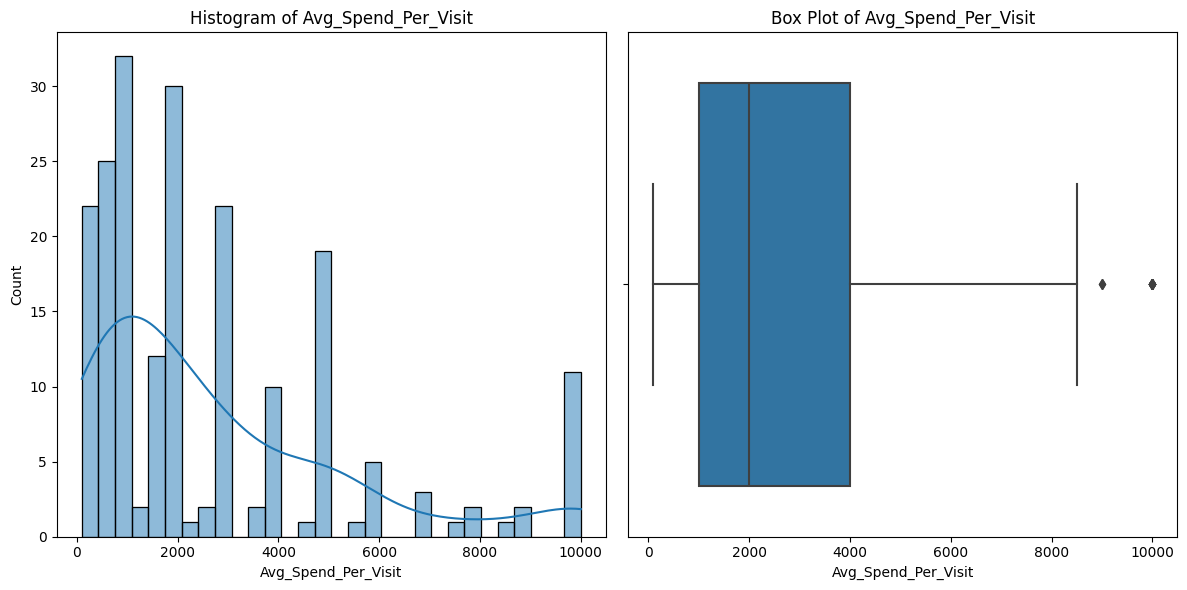

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
mean_value = df['Avg_Spend_Per_Visit'].mean()
median_value = df['Avg_Spend_Per_Visit'].median()
mode_value = df['Avg_Spend_Per_Visit'].mode()[0]
std_deviation = df['Avg_Spend_Per_Visit'].std()
percentiles = df['Avg_Spend_Per_Visit'].quantile([0.25, 0.5, 0.75])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Percentiles:\n{percentiles}")

# Visualize Distribution
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Avg_Spend_Per_Visit'].dropna(), bins=30, kde=True)
plt.title('Histogram of Avg_Spend_Per_Visit')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Avg_Spend_Per_Visit'].dropna())
plt.title('Box Plot of Avg_Spend_Per_Visit')

plt.tight_layout()
plt.show()


In [290]:
import pandas as pd

# Fill NaN values with the median value of the column
median_value = df['Avg_Spend_Per_Visit'].median()
df['Avg_Spend_Per_Visit'].fillna(median_value, inplace=True)

C:\Users\AMOL\AppData\Local\Temp\ipykernel_11016\4110139592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg_Spend_Per_Visit'].fillna(median_value, inplace=True)


In [291]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'Avg_Spend_Per_Visit' column to numeric datatype
df['Avg_Spend_Per_Visit'] = pd.to_numeric(df['Avg_Spend_Per_Visit'], errors='coerce')

In [292]:
df['Avg_Spend_Per_Visit'].describe()

count     235.00
mean     2654.64
std      2462.81
min       100.00
25%      1000.00
50%      2000.00
75%      3000.00
max     10000.00
Name: Avg_Spend_Per_Visit, dtype: float64

In [293]:
import pandas as pd
import numpy as np

# Function to clean and convert values
def clean_and_convert(value):
    # Remove non-numeric characters and handle ranges
    value = value.replace(',', '').replace(' ', '').replace('₹', '').replace('Rs', '').replace('$', '').replace('k', '000').replace('thousand', '000')
    if '-' in value:
        parts = [part for part in value.split('-') if part.replace('.', '').isdigit()]
        if not parts:
            return np.nan
        max_value = max(float(part) for part in parts)
        return max_value
    else:
        return float(value) if value.replace('.', '').isdigit() else np.nan

# Apply the cleaning function to your DataFrame
df['Avg_Spend_Monthly'] = df['Avg_Spend_Monthly'].apply(clean_and_convert)

# Assuming 'Avg_Spend_Per_Visit' column exists and has numeric values
# Compare and put NaN where 'Avg_Spend_Monthly' is less than or equal to 'Avg_Spend_Per_Visit'
df['Avg_Spend_Monthly'] = np.where(df['Avg_Spend_Monthly'] <= df['Avg_Spend_Per_Visit'], np.nan, df['Avg_Spend_Monthly'])

# Display the cleaned unique values without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
print(df['Avg_Spend_Monthly'].unique())


[15000.  5000.  7700. 20000.  4000. 17000.  3000.    nan 25000. 12000.
  9000. 10000.  8000.  6000.  7000. 11000.  1300.  2500.  2000. 11500.
  4500.  1000. 14000.  5900. 50000. 30000.  2800. 16000.  1800.  7500.]


In [294]:
df['Avg_Spend_Monthly'].unique()

array([15000.,  5000.,  7700., 20000.,  4000., 17000.,  3000.,    nan,
       25000., 12000.,  9000., 10000.,  8000.,  6000.,  7000., 11000.,
        1300.,  2500.,  2000., 11500.,  4500.,  1000., 14000.,  5900.,
       50000., 30000.,  2800., 16000.,  1800.,  7500.])

C:\Users\AMOL\AppData\Local\Temp\ipykernel_11016\1833025098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg_Spend_Monthly'])
C:\Users\AMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Avg_Spend_Monthly', ylabel='Density'>

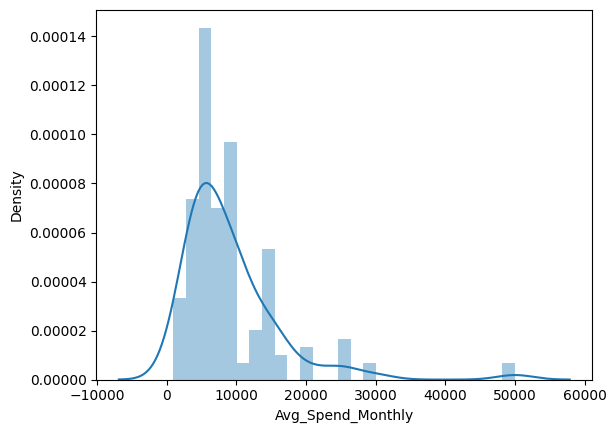

In [295]:
sns.distplot(df['Avg_Spend_Monthly'])

In [296]:
# Median Imputation
df['Avg_Spend_Monthly'].fillna(df['Avg_Spend_Monthly'].median(), inplace=True)

C:\Users\AMOL\AppData\Local\Temp\ipykernel_11016\2679497219.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg_Spend_Monthly'].fillna(df['Avg_Spend_Monthly'].median(), inplace=True)


In [297]:
df['Avg_Spend_Monthly'].describe()

count     235.00
mean     8531.91
std      6155.61
min      1000.00
25%      5000.00
50%      7000.00
75%     10000.00
max     50000.00
Name: Avg_Spend_Monthly, dtype: float64

In [298]:
import pandas as pd

# Function to simplify payment mode
def simplify_payment_mode(payment_mode):
    mapping = {
        'Debit/Credit card': 'Debit/Credit card',
        'UPI (e.g., Google Pay, PhonePe, Paytm, Amazon Pay, BHIM UPI, Rupay UPI, etc.)': 'UPI',
        'Cash': 'Cash',
        'No idea': 'Digital wallets',
        'Digital wallets': 'Digital wallets',
        'Cash /UPI': 'Digital wallets',
        'Online or cash': 'Digital wallets'
    }
    return mapping.get(payment_mode, 'Digital wallets')

# Apply the function to the Payment_Mode column
df['Payment_Mode'] = df['Payment_Mode'].apply(simplify_payment_mode)

In [299]:
df['Payment_Mode'].value_counts()

Payment_Mode
UPI                  117
Cash                  60
Debit/Credit card     54
Digital wallets        4
Name: count, dtype: int64

In [300]:
def check_unique_values(df):
    unique_values = {}
    for column in df.columns:
        unique_values[column] = df[column].unique()
    return unique_values

# Use the function to check unique values
unique_values = check_unique_values(df)

# Display the unique values for each column
for column, values in unique_values.items():
    print(f"Column '{column}': {values}\n")

Column 'Family_Structure': ['Nuclear family' 'Joint family']

Column 'Age': [21. 22. 19. 25. 23. 38. 37. 40. 24. 35. 36. 18. 20. 44. 54. 26. 65. 45.
 39. 47. 55. 16. 46. 28. 33. 17. 68. 43. 34. 62. 50. 56. 32. 31. 30. 53.
 59. 51. 42. 15. 48. 60. 52. 27. 49. 57. 58. 29.]

Column 'Gender': ['Male' 'Female']

Column 'Occupation': ['Student' 'Self-employed' 'Private sector employee' 'Homemaker'
 'Government employee' 'Retired']

Column 'Education': ['Postgraduate' 'Graduate' 'No formal education' 'Secondary']

Column 'Income_Range': ['₹75,000 - ₹99,999' '₹25,000 - ₹49,999' '₹1,25,000 - ₹1,49,999'
 '₹1,00,000 - ₹1,24,999' 'More than ₹1,50,000' 'Less than ₹25,000'
 '₹50,000 - ₹74,999']

Column 'Primary_Shopper': ['Joint responsibility' 'Other family member' 'Self' 'Spouse/partner']

Column 'Shopping_Companion': ['With family' 'Alone' 'With friends']

Column 'Shopping_Frequency': ['Once a month' 'Once a week' '2-3 times per week' 'Less frequently'
 'Daily']

Column 'Shopping_Time': ['Evening

In [301]:
import pandas as pd
import numpy as np

# Function to split, clean, consolidate categories, and classify remaining as "Other"
def split_clean_consolidate(platforms):
    existing_categories = ['BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart', 'Amazon Fresh']
    consolidated = []
    if pd.isna(platforms):
        return []
    platforms = [platform.strip() for platform in platforms.split(',')]
    for platform in platforms:
        if platform.startswith('D') or platform.startswith('d'):
            consolidated.append('D-Mart')
        elif platform.startswith('Flipkart'):
            consolidated.append('Flipkart')
        elif platform.startswith('Swiggy'):
            consolidated.append('Swiggy Instamart')
        elif platform in existing_categories:
            consolidated.append(platform)
        else:
            consolidated.append('Other_Online_Platforms')
    return list(set(consolidated))  # Remove duplicates

# Apply the function to the 'Online_Platforms' column
df['Online_Platforms'] = df['Online_Platforms'].apply(split_clean_consolidate)

# Define the complete list of unique platforms including additional categories
all_platforms = ['BigBasket', 'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart', 'Amazon Fresh', 'Flipkart', 'D-Mart', 'Other_Online_Platforms']

# One-hot encode the platforms
for platform in all_platforms:
    df[platform] = df['Online_Platforms'].apply(lambda x: 1 if platform in x else 0)

In [302]:
df.head()

,Family_Structure,Age,Gender,Occupation,Education,Income_Range,Primary_Shopper,Shopping_Companion,Shopping_Frequency,Shopping_Time,Preferred_Store,Factor_Proximity,Factor_Pricing,Factor_Variety,Factor_Fresh_Produce,Factor_Store_Layout,Factor_Online_Options,Product_Preferences,Brand_Importance,Bulk_or_Need,Quantity_Per_Trip,Time_Spent_Per_Visit,Avg_Spend_Per_Visit,Avg_Spend_Monthly,Payment_Mode,Discount_Awareness,Discount_Usage,Discount_Value,Discount_Influence,Loyalty_Score,Online_Shopping_Frequency,Online_Platforms,Online_Shopping_Factors,Cart_Abandonment_Reasons,Store_Quality_Rating,Store_Pricing_Rating,Recommendation_Likelihood,Sustainability_Importance,Eco_Friendly_Actions,Store_Sustainability_Efforts,BigBasket,Blinkit,Swiggy Instamart,Zepto,JioMart,Amazon Fresh,Flipkart,D-Mart,Other_Online_Platforms
0,Nuclear family,21.00,Male,Student,Postgraduate,"₹75,000 - ₹99,999",Joint responsibility,With family,Once a month,Evening,Supermarkets,1,2,1,1,2,4,No preference,Somewhat important,Bulk purchases,5-9.9 kg,1 - 1.5 hours,500.00,15000.00,Debit/Credit card,Newspaper,Never,Not sure,No difference,4,Never,[],NaN,NaN,4,4.00,Likely,Somewhat important,"Yes, always",Maybe,0,0,0,0,0,0,0,0,0
1,Nuclear family,21.00,Female,Student,Postgraduate,"₹25,000 - ₹49,999",Joint responsibility,With family,Once a week,Evening,Local Kirana stores,1,2,1,1,1,2,Kirana store,Somewhat important,As needed,2-4.9 kg,15 minutes - 45 minutes,3000.00,15000.00,UPI,Online ads,Rarely,Yes,"Yes, significantly",5,Rarely,"[Blinkit, Zepto, Swiggy Instamart]","Delivery speed, Product availability, Website/...",High delivery cost,5,5.00,Very likely,Very important,"Yes, always",Yes,0,1,1,1,0,0,0,0,0
2,Joint family,22.00,Male,Student,Postgraduate,"₹1,25,000 - ₹1,49,999",Other family member,Alone,2-3 times per week,Morning,Supermarkets,4,4,4,4,4,4,Supermarket,Somewhat important,As needed,2-4.9 kg,15 minutes - 45 minutes,3000.00,15000.00,Cash,In-store promotions,Occasionally,No,"Yes, slightly",4,Occasionally,[JioMart],Customer service,Long delivery times,3,4.00,Unlikely,Somewhat important,"Yes, always",Yes,0,0,0,0,1,0,0,0,0
3,Nuclear family,21.00,Female,Student,Graduate,"₹25,000 - ₹49,999",Self,Alone,Once a month,Evening,Local Kirana stores,4,3,3,3,3,5,Kirana store,Neutral,Bulk purchases,Less than 2 kg,15 minutes - 45 minutes,2000.00,5000.00,Cash,Word of mouth,Occasionally,Not sure,"Yes, slightly",5,Occasionally,"[Swiggy Instamart, Zepto]","Product availability, Payment options, Discounts",High delivery cost,4,4.00,Likely,Somewhat important,"Yes, occasionally",No,0,0,1,1,0,0,0,0,0
4,Nuclear family,22.00,Male,Student,Postgraduate,"₹1,00,000 - ₹1,24,999",Joint responsibility,With family,2-3 times per week,Morning,Local Kirana stores,1,3,2,1,2,4,Kirana store,Somewhat important,Bulk purchases,5-9.9 kg,45 minutes - 1 hour,770.00,7700.00,UPI,In-store promotions,Occasionally,Not sure,"Yes, slightly",3,Never,[],NaN,NaN,5,4.00,Neutral,Neutral,Rarely,Maybe,0,0,0,0,0,0,0,0,0


In [303]:
df.columns

Index(['Family_Structure', 'Age', 'Gender', 'Occupation', 'Education',
       'Income_Range', 'Primary_Shopper', 'Shopping_Companion',
       'Shopping_Frequency', 'Shopping_Time', 'Preferred_Store',
       'Factor_Proximity', 'Factor_Pricing', 'Factor_Variety',
       'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options',
       'Product_Preferences', 'Brand_Importance', 'Bulk_or_Need',
       'Quantity_Per_Trip', 'Time_Spent_Per_Visit', 'Avg_Spend_Per_Visit',
       'Avg_Spend_Monthly', 'Payment_Mode', 'Discount_Awareness',
       'Discount_Usage', 'Discount_Value', 'Discount_Influence',
       'Loyalty_Score', 'Online_Shopping_Frequency', 'Online_Platforms',
       'Online_Shopping_Factors', 'Cart_Abandonment_Reasons',
       'Store_Quality_Rating', 'Store_Pricing_Rating',
       'Recommendation_Likelihood', 'Sustainability_Importance',
       'Eco_Friendly_Actions', 'Store_Sustainability_Efforts', 'BigBasket',
       'Blinkit', 'Swiggy Instamart', 'Zepto', 'JioMart

In [304]:
df['BigBasket'].value_counts()

BigBasket
0    197
1     38
Name: count, dtype: int64

In [305]:
df['Online_Shopping_Frequency'].value_counts()

Online_Shopping_Frequency
Rarely          83
Occasionally    71
Never           48
Frequently      33
Name: count, dtype: int64

In [307]:
# Function to split, clean, consolidate categories, and classify remaining as "Other"
def split_clean_consolidate(factors):
    existing_categories = ['Delivery speed', 'Product availability', 'Website/App experience', 'Payment options', 'Customer service', 'Product Quality']
    consolidated = []
    if pd.isna(factors):
        return []
    factors = [factor.strip() for factor in factors.split(',')]
    for factor in factors:
        if 'Quality' in factor:
            consolidated.append('Product Quality')
        elif factor in existing_categories:
            consolidated.append(factor)
        else:
            consolidated.append('Other_Online_Shopping_Factors')
    return list(set(consolidated))  # Remove duplicates

# Apply the function to the 'Online_Shopping_Factors' column
df['Online_Shopping_Factors'] = df['Online_Shopping_Factors'].apply(split_clean_consolidate)

# Define the complete list of unique factors including additional categories
all_factors = ['Delivery speed', 'Product availability', 'Website/App experience', 'Payment options', 'Customer service', 'Product Quality', 'Other_Online_Shopping_Factors']

# One-hot encode the factors
for factor in all_factors:
    df[factor] = df['Online_Shopping_Factors'].apply(lambda x: 1 if factor in x else 0)

In [312]:
# Function to classify shopper's type
def classify_shopper(frequency):
    if frequency == 'Never':
        return 'Offline shopper'
    else:
        return 'Online shopper'

# Apply the function to create the new column
df["Shopper's_Type"] = df['Online_Shopping_Frequency'].apply(classify_shopper)

In [315]:
df['Shopper\'s_Type'].value_counts()

Shopper's_Type
Online shopper     187
Offline shopper     48
Name: count, dtype: int64

In [316]:
# Function to split, clean, consolidate categories, and classify remaining as "Other"
def split_clean_consolidate_reasons(reasons):
    existing_categories = ['High delivery cost', 'Long delivery times', 'Found a better deal', 'Payment issues', 'Never']
    consolidated = []
    if pd.isna(reasons):
        return []
    reasons = [reason.strip() for reason in reasons.split(',')]
    for reason in reasons:
        if reason in existing_categories:
            consolidated.append(reason)
        else:
            consolidated.append('Other_Cart_Abandonment_Reasons')
    return list(set(consolidated))  # Remove duplicates

# Apply the function to the 'Cart_Abandonment_Reasons' column
df['Cart_Abandonment_Reasons'] = df['Cart_Abandonment_Reasons'].apply(split_clean_consolidate_reasons)

# Define the complete list of unique reasons including additional categories
all_reasons = ['High delivery cost', 'Long delivery times', 'Found a better deal', 'Payment issues', 'Never', 'Other_Cart_Abandonment_Reasons']

# One-hot encode the reasons
for reason in all_reasons:
    df[reason] = df['Cart_Abandonment_Reasons'].apply(lambda x: 1 if reason in x else 0)

In [317]:
df

,Family_Structure,Age,Gender,Occupation,Education,Income_Range,Primary_Shopper,Shopping_Companion,Shopping_Frequency,Shopping_Time,Preferred_Store,Factor_Proximity,Factor_Pricing,Factor_Variety,Factor_Fresh_Produce,Factor_Store_Layout,Factor_Online_Options,Product_Preferences,Brand_Importance,Bulk_or_Need,Quantity_Per_Trip,Time_Spent_Per_Visit,Avg_Spend_Per_Visit,Avg_Spend_Monthly,Payment_Mode,Discount_Awareness,Discount_Usage,Discount_Value,Discount_Influence,Loyalty_Score,Online_Shopping_Frequency,Online_Platforms,Online_Shopping_Factors,Cart_Abandonment_Reasons,Store_Quality_Rating,Store_Pricing_Rating,Recommendation_Likelihood,Sustainability_Importance,Eco_Friendly_Actions,Store_Sustainability_Efforts,BigBasket,Blinkit,Swiggy Instamart,Zepto,JioMart,Amazon Fresh,Flipkart,D-Mart,Other_Online_Platforms,Delivery speed,Product availability,Website/App experience,Payment options,Customer service,Product Quality,Other_Online_Shopping_Factors,Shopper's_Type,High delivery cost,Long delivery times,Found a better deal,Payment issues,Never,Other_Cart_Abandonment_Reasons
0,Nuclear family,21.00,Male,Student,Postgraduate,"₹75,000 - ₹99,999",Joint responsibility,With family,Once a month,Evening,Supermarkets,1,2,1,1,2,4,No preference,Somewhat important,Bulk purchases,5-9.9 kg,1 - 1.5 hours,500.00,15000.00,Debit/Credit card,Newspaper,Never,Not sure,No difference,4,Never,[],[],[],4,4.00,Likely,Somewhat important,"Yes, always",Maybe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Offline shopper,0,0,0,0,0,0
1,Nuclear family,21.00,Female,Student,Postgraduate,"₹25,000 - ₹49,999",Joint responsibility,With family,Once a week,Evening,Local Kirana stores,1,2,1,1,1,2,Kirana store,Somewhat important,As needed,2-4.9 kg,15 minutes - 45 minutes,3000.00,15000.00,UPI,Online ads,Rarely,Yes,"Yes, significantly",5,Rarely,"[Blinkit, Zepto, Swiggy Instamart]","[Delivery speed, Payment options, Product avai...",[High delivery cost],5,5.00,Very likely,Very important,"Yes, always",Yes,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,Online shopper,1,0,0,0,0,0
2,Joint family,22.00,Male,Student,Postgraduate,"₹1,25,000 - ₹1,49,999",Other family member,Alone,2-3 times per week,Morning,Supermarkets,4,4,4,4,4,4,Supermarket,Somewhat important,As needed,2-4.9 kg,15 minutes - 45 minutes,3000.00,15000.00,Cash,In-store promotions,Occasionally,No,"Yes, slightly",4,Occasionally,[JioMart],[Customer service],[Long delivery times],3,4.00,Unlikely,Somewhat important,"Yes, always",Yes,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,Online shopper,0,1,0,0,0,0
3,Nuclear family,21.00,Female,Student,Graduate,"₹25,000 - ₹49,999",Self,Alone,Once a month,Evening,Local Kirana stores,4,3,3,3,3,5,Kirana store,Neutral,Bulk purchases,Less than 2 kg,15 minutes - 45 minutes,2000.00,5000.00,Cash,Word of mouth,Occasionally,Not sure,"Yes, slightly",5,Occasionally,"[Swiggy Instamart, Zepto]","[Other_Online_Shopping_Factors, Payment option...",[High delivery cost],4,4.00,Likely,Somewhat important,"Yes, occasionally",No,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,Online shopper,1,0,0,0,0,0
4,Nuclear family,22.00,Male,Student,Postgraduate,"₹1,00,000 - ₹1,24,999",Joint responsibility,With family,2-3 times per week,Morning,Local Kirana stores,1,3,2,1,2,4,Kirana store,Somewhat important,Bulk purchases,5-9.9 kg,45 minutes - 1 hour,770.00,7700.00,UPI,In-store promotions,Occasionally,Not sure,"Yes, slightly",3,Never,[],[],[],5,4.00,Neutral,Neutral,Rarely,Maybe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Offline shopper,0,0,0,0,0,0
5,Joint family,19.00,Male,Self-employed,Postgraduate,"More than ₹1,50,000",Spouse/partner,With family,Once a week,Evening,Supermarkets,4,4,4,4,4,4,Supermarket,Neutral,Small frequent purchases,2-4.9 kg,15 minutes - 45 minutes,4000.00,20000.00,UPI,Online ads,Occasionally,Yes,"Yes, slightly",4,Occasionally,[Zepto],"[Customer service, Payment options]",[Payment issues],2,2.00,Neutral,Neutral,"Yes, occasionally",Yes,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,Online shopper,0,0,0,1,0,0
6,Nuclear family,22.00,Male,Private sector employee,Postgraduate,"₹25,000 - ₹49,999

In [328]:
df['Other_Cart_Abandonment_Reasons'].value_counts()

Other_Cart_Abandonment_Reasons
0    233
1      2
Name: count, dtype: int64

In [334]:
# Calculate the mode of the column
mode_value = df['Store_Pricing_Rating'].mode()[0]

# Impute the missing value with the mode
df['Store_Pricing_Rating'].fillna(mode_value, inplace=True)

C:\Users\AMOL\AppData\Local\Temp\ipykernel_11016\2005516321.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Store_Pricing_Rating'].fillna(mode_value, inplace=True)


In [337]:
# Calculate the mode of the column
mode_value = df['Eco_Friendly_Actions'].mode()[0]

# Impute the missing value with the mode
df['Eco_Friendly_Actions'].fillna(mode_value, inplace=True)

C:\Users\AMOL\AppData\Local\Temp\ipykernel_11016\1110126916.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Eco_Friendly_Actions'].fillna(mode_value, inplace=True)


In [341]:
# List of Factor columns
factor_columns = [
    'Factor_Proximity', 'Factor_Pricing', 'Factor_Variety', 
    'Factor_Fresh_Produce', 'Factor_Store_Layout', 'Factor_Online_Options'
]

# Convert Factor columns to categorical
for column in factor_columns:
    df[column] = df[column].astype('category')

In [343]:
def check_unique_values(df):
    unique_values = {}
    for column in df.columns:
        try:
            unique_values[column] = list(df[column].unique())
        except TypeError:
            # Handle columns with unhashable types
            unique_values[column] = list(set(tuple(x) if isinstance(x, list) else x for x in df[column]))
    return unique_values

# Use the function to check unique values
unique_values = check_unique_values(df)

# Display the unique values for each column
for column, values in unique_values.items():
    print(f"Column '{column}': {values}\n")

Column 'Family_Structure': ['Nuclear family', 'Joint family']

Column 'Age': [21.0, 22.0, 19.0, 25.0, 23.0, 38.0, 37.0, 40.0, 24.0, 35.0, 36.0, 18.0, 20.0, 44.0, 54.0, 26.0, 65.0, 45.0, 39.0, 47.0, 55.0, 16.0, 46.0, 28.0, 33.0, 17.0, 68.0, 43.0, 34.0, 62.0, 50.0, 56.0, 32.0, 31.0, 30.0, 53.0, 59.0, 51.0, 42.0, 15.0, 48.0, 60.0, 52.0, 27.0, 49.0, 57.0, 58.0, 29.0]

Column 'Gender': ['Male', 'Female']

Column 'Occupation': ['Student', 'Self-employed', 'Private sector employee', 'Homemaker', 'Government employee', 'Retired']

Column 'Education': ['Postgraduate', 'Graduate', 'No formal education', 'Secondary']

Column 'Income_Range': ['₹75,000 - ₹99,999', '₹25,000 - ₹49,999', '₹1,25,000 - ₹1,49,999', '₹1,00,000 - ₹1,24,999', 'More than ₹1,50,000', 'Less than ₹25,000', '₹50,000 - ₹74,999']

Column 'Primary_Shopper': ['Joint responsibility', 'Other family member', 'Self', 'Spouse/partner']

Column 'Shopping_Companion': ['With family', 'Alone', 'With friends']

Column 'Shopping_Frequency': ['

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 235
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Family_Structure                235 non-null    object  
 1   Age                             235 non-null    float64 
 2   Gender                          235 non-null    object  
 3   Occupation                      235 non-null    object  
 4   Education                       235 non-null    object  
 5   Income_Range                    235 non-null    object  
 6   Primary_Shopper                 235 non-null    object  
 7   Shopping_Companion              235 non-null    object  
 8   Shopping_Frequency              235 non-null    object  
 9   Shopping_Time                   235 non-null    object  
 10  Preferred_Store                 235 non-null    object  
 11  Factor_Proximity                235 non-null    category
 12  Factor_Pricing             

In [345]:
import pandas as pd

# Assuming 'df' is your preprocessed DataFrame
# Define the file path and name for your Excel file
file_path = 'preprocessed_data.xlsx'

# Save the DataFrame to an Excel file
df.to_excel(file_path, index=False)

print(f"DataFrame successfully saved to {file_path}")

DataFrame successfully saved to preprocessed_data.xlsx
